# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 마케팅 수신 여부에 동의한 사람들은 재구독에 호의적이지 않을까?
→ 마케팅 수신 여부와 구독 연장에 대해 보기내기

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [55]:
user_data = pd.read_csv('data/user_data.csv')
mini = pd.read_csv('data/mini.csv')

In [116]:
# 마케팅 수신 여부에 동의한 사람

marketing_opt_in = user_data[user_data['marketing'] == True]
print("Marketing Opt-in Users:")
print(marketing_opt_in.head())

Marketing Opt-in Users:
             user_id           created_at           updated_at name  \
18  33a3b1cf1644a177   2022-09-06 4:02:36  2022-09-06 15:31:25  온은서   
19  754ae7d5ec637143  2021-09-02 14:06:01  2022-07-28 10:48:57  하민서   
20  94c2da418acc6689  2022-08-12 15:08:48   2022-10-18 2:55:46  윤수아   
21  f9562e86a41ed682  2022-08-18 13:11:22   2022-08-30 9:05:36  박준우   
22  52ad89d6bade2cc1   2021-11-30 8:59:28  2022-08-03 10:47:42  양지아   

    marketing  managed  gender  age  progress_rate  
18       True     True    male   30          80.68  
19       True     True  female   10          44.32  
20       True     True  female   20          98.86  
21       True     True    male   40           0.00  
22       True     True    male   30          88.64  


In [117]:
# 다음달에도 구독할 예정 사람

target_1_users = mini[mini['target'] == 1]
print("Users with Target = 1:")
print(target_1_users.head())

Users with Target = 1:
    user_id  subscription_duration  recent_login_time  average_login_time  \
1  a0a60abb                     16                 18           18.453224   
2  b9f171ae                     22                  1           16.195228   
3  5dc0ba8b                      1                 19           17.628656   
4  65c83654                      4                  5           21.390656   
6  682ca511                      8                 23           10.629897   

   average_time_per_learning_session  monthly_active_learning_days  \
1                          72.646087                            16   
2                          21.774492                            13   
3                          42.659066                            19   
4                          30.744287                            19   
6                         116.455949                            12   

   total_completed_courses  recent_learning_achievement  \
1                       13        

In [119]:
total_users = len(user_data)

In [120]:
marketing_opt_in_ratio = len(marketing_opt_in) / total_users * 100

In [121]:
target_1_ratio = len(target_1_users) / total_users * 100

In [122]:
labels = ['Marketing Opt-in', 'Target = 1']
values = [marketing_opt_in_ratio, target_1_ratio]

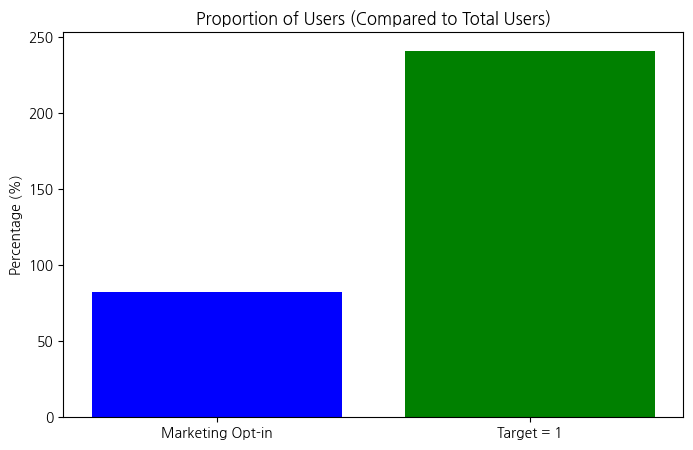

In [123]:
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Proportion of Users (Compared to Total Users)')
plt.ylabel('Percentage (%)')
plt.show()

시각화를 잘못한 거 같다.......

In [126]:
target_1_users_with_marketing = target_1_users.merge(user_data, on='user_id', how='left')

In [131]:
target_1_marketing_count = len(target_1_users_with_marketing[target_1_users_with_marketing['marketing'] == True])
target_1_total_count = len(target_1_users_with_marketing)

In [128]:
target_1_marketing_ratio = (target_1_marketing_count / target_1_total_count) * 100 if target_1_total_count > 0 else 0

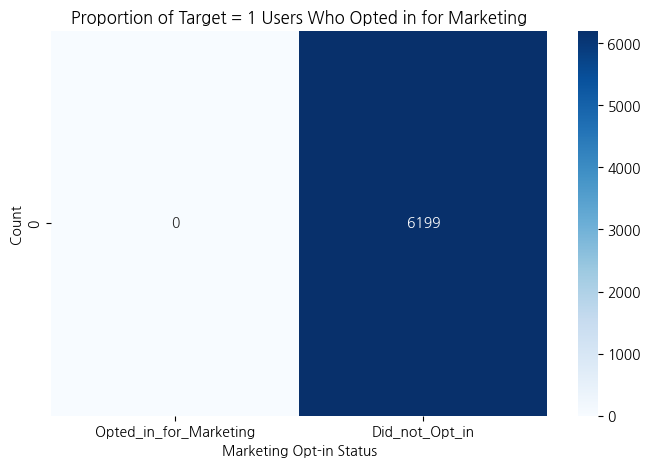

In [130]:
heatmap_data = pd.DataFrame({
    'Opted_in_for_Marketing': [target_1_marketing_count],
    'Did_not_Opt_in': [target_1_total_count - target_1_marketing_count]
})

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Proportion of Target = 1 Users Who Opted in for Marketing')
plt.xlabel('Marketing Opt-in Status')
plt.ylabel('Count')
plt.show()

데이터를 다시 봐보자  
Target 항목의 비율부터 다시 봐볼까?

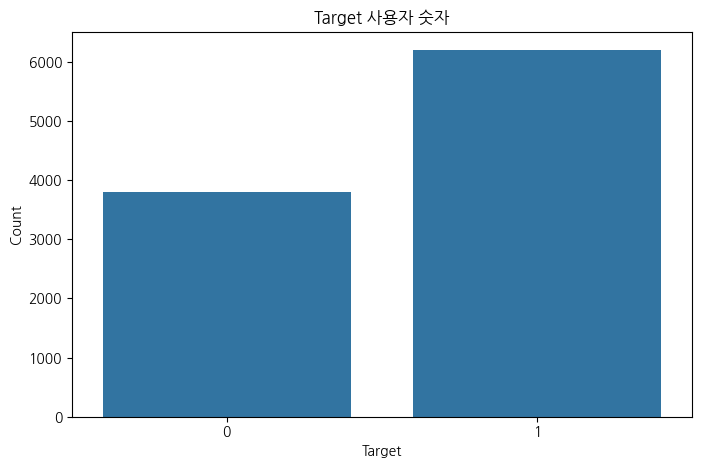

In [135]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=mini)
plt.title('Target 사용자 숫자')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

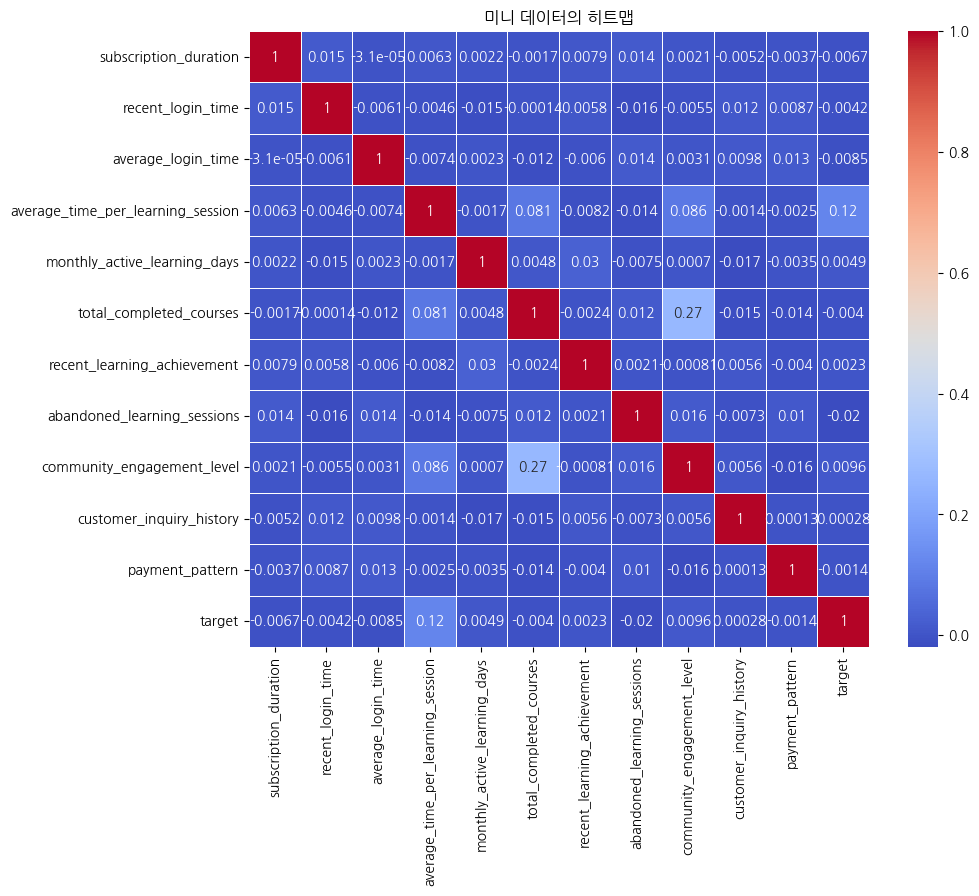

In [139]:
plt.figure(figsize=(10, 8))
sns.heatmap(mini.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('미니 데이터의 히트맵')
plt.show

In [142]:
target_0_data = mini[mini['target'] == 0]
print("Target = 0 Users Overview:")
print(target_0_data.describe())

Target = 0 Users Overview:
       subscription_duration  recent_login_time  average_login_time  \
count            3801.000000         3801.00000         3801.000000   
mean               11.953959           15.05788           15.026762   
std                 6.618295            8.42873            2.956732   
min                 1.000000            1.00000            3.636424   
25%                 6.000000            8.00000           13.077376   
50%                12.000000           15.00000           14.979239   
75%                18.000000           22.00000           17.030607   
max                23.000000           29.00000           26.998490   

       average_time_per_learning_session  monthly_active_learning_days  \
count                        3801.000000                   3801.000000   
mean                           46.456986                     12.502236   
std                            39.639733                      6.854200   
min                             0.011

### 0인 사람들의 특징 중 눈에 띄는 걸 확인해보자!
```
원하던 데이터의 상관관계를 시각화하지 못했지만  
마케팅에 호의적인 사람들은 다양한 서비스를 누리지 않을까?

반대로 구독 의사가 없는 사람들은 커뮤니티 참여도가 낮지 않을까
-> 그들의 참여도를 봐보자

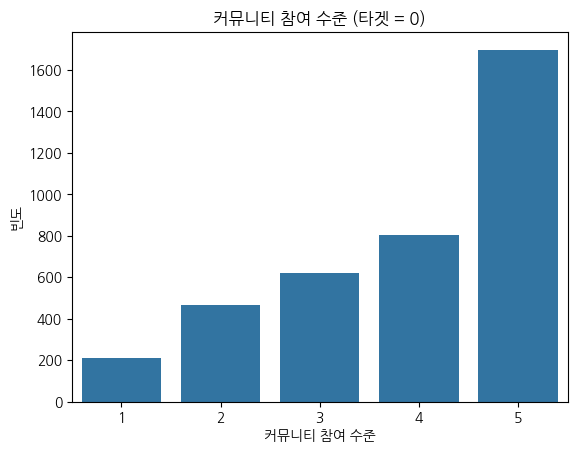

In [143]:
if 'community_engagement_level' in target_0_data.columns:
    plt.figure()
    sns.countplot(x='community_engagement_level', data=target_0_data)
    plt.title('커뮤니티 참여 수준 (타겟 = 0)')
    plt.xlabel('커뮤니티 참여 수준')
    plt.ylabel('빈도')
    plt.show()

In [145]:
target_1_data = mini[mini['target'] == 1]
print("Target = 1 Users Overview:")
print(target_1_data.describe())

Target = 1 Users Overview:
       subscription_duration  recent_login_time  average_login_time  \
count             6199.00000        6199.000000         6199.000000   
mean                11.86272          14.985804           14.974035   
std                  6.59050           8.322310            3.029275   
min                  1.00000           1.000000            2.366189   
25%                  6.00000           8.000000           12.976618   
50%                 12.00000          15.000000           14.979217   
75%                 18.00000          22.000000           16.964874   
max                 23.00000          29.000000           26.284396   

       average_time_per_learning_session  monthly_active_learning_days  \
count                        6199.000000                   6199.000000   
mean                           60.105533                     12.571866   
std                            63.477523                      6.980077   
min                             0.013

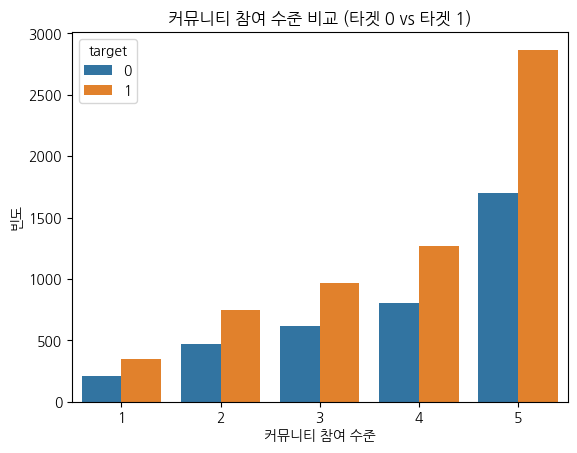

In [147]:
if 'community_engagement_level' in mini.columns:
    plt.figure()
    sns.countplot(x='community_engagement_level', hue='target', data=mini)
    plt.title('커뮤니티 참여 수준 비교 (타겟 0 vs 타겟 1)')
    plt.xlabel('커뮤니티 참여 수준')
    plt.ylabel('빈도')
    plt.show()

```
1-4 레벨에서는 target이 0인 사람과 1인 사람의 차이가 크지 않지만
5로 오니까 차이의 폭이 조금 더 큰 걸 확인할 수 있었다!

커뮤니티 참여도가 구독 여부에 어느 정도 여부를 미친다고 생각해도 될 거 같다
구독 연장을 이끌어내기 위해 플랫폼 서비스를 다양하게 이용할 수 있도록 유도하면 좋을 거 같다.
```